In [ ]:
!git clone https://github.com/andresprados/SPIGA spiga_project

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from spiga_project.spiga.inference.config import ModelConfig
from spiga_project.spiga.inference.framework import SPIGAFramework

In [2]:
def draw_synthetic_mask(image: np.ndarray, bounding_box: list):

    processor = SPIGAFramework(ModelConfig('merlrav'))
    features = processor.inference(image, [bounding_box])
    
    landmarks = features['landmarks'][0]
    chin_landmarks = landmarks[1:16]
    nose_landmark = landmarks[29]
    points = chin_landmarks + [nose_landmark]
    points = np.array(points).astype(int)

    masked_img = image.copy()
    cv2.fillPoly(masked_img, pts=[points], color=(235, 235, 235))
    return masked_img

SPIGA model loaded!


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


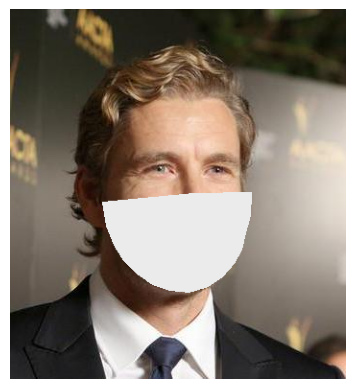

In [3]:
image = cv2.imread('0017_01.jpg')
bounding_box = [75, 80, 300, 275]
masked_img = draw_synthetic_mask(image, bounding_box)

masked_img = cv2.cvtColor(masked_img, cv2.COLOR_RGB2BGR)
plt.imshow(masked_img)
plt.axis('off')
plt.show()